<center><h1 style="font-size:35px; font-family: 'Times New Roman'; letter-spacing: 0.1em;">House Price Prediction 🏡</h1></center>

<center><img src="https://images.unsplash.com/photo-1516156008625-3a9d6067fab5?ixlib=rb-1.2.1&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=870&q=80"></center>

<h1 style="font-family: 'Times New Roman'; letter-spacing: 0.08em;">Importing the Essential Libraries, Metrics</h1>

In [49]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures

<h1 style="font-family: 'Times New Roman'; letter-spacing: 0.08em;">Loading the Data</h1>

In [50]:
df = pd.read_excel("DATA RUMAH.xlsx")

<h1 style="font-family: 'Times New Roman'; letter-spacing: 0.08em;">Exploratory Data Analysis</h1>

***Taking a look at the first 5 rows of the dataset***

In [51]:
df

,NO,NAMA RUMAH,HARGA,LB,LT,KT,KM,GRS
0,1,"Rumah Murah Hook Tebet Timur, Tebet, Jakarta S...",3800000000,220,220,3,3,0
1,2,"Rumah Modern di Tebet dekat Stasiun, Tebet, Ja...",4600000000,180,137,4,3,2
2,3,"Rumah Mewah 2 Lantai Hanya 3 Menit Ke Tebet, T...",3000000000,267,250,4,4,4
3,4,"Rumah Baru Tebet, Tebet, Jakarta Selatan",430000000,40,25,2,2,0
4,5,"Rumah Bagus Tebet komp Gudang Peluru lt 350m, ...",9000000000,400,355,6,5,3
...,...,...,...,...,...,...,...,...
1005,1006,Rumah Strategis Akses Jalan 2mobil Di Menteng ...,9000000000,450,550,10,10,3
1006,1007,Tebet Rumah Siap Huni Jln 2 Mbl Nyaman,4000000000,160,140,4,3,2
1007,1008,"Di Kebun Baru Rumah Terawat, Area Strategis",4000000000,139,230,4,4,1
1008,1009,Dijual Cepat Rumah Komp Depkeu Dr Soepomo Tebe...,19000000000,360,606,7,4,0


***Checking the shape—i.e. size—of the data***

In [52]:
df.shape

(1010, 8)

***Learning the dtypes of columns' and how many non-null values are there in those columns***

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010 entries, 0 to 1009
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   NO          1010 non-null   int64 
 1   NAMA RUMAH  1010 non-null   object
 2   HARGA       1010 non-null   int64 
 3   LB          1010 non-null   int64 
 4   LT          1010 non-null   int64 
 5   KT          1010 non-null   int64 
 6   KM          1010 non-null   int64 
 7   GRS         1010 non-null   int64 
dtypes: int64(7), object(1)
memory usage: 63.2+ KB


***Getting the statistical summary of dataset***

In [54]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
NO,1010.0,5.055000e+02,2.917062e+02,1.0,2.532500e+02,5.055000e+02,7.577500e+02,1.010000e+03
HARGA,1010.0,7.628987e+09,7.340946e+09,430000000.0,3.262500e+09,5.000000e+09,9.000000e+09,6.500000e+10
LB,1010.0,2.765396e+02,1.778646e+02,40.0,1.500000e+02,2.165000e+02,3.500000e+02,1.126000e+03
LT,1010.0,2.374327e+02,1.799576e+02,25.0,1.300000e+02,1.650000e+02,2.900000e+02,1.400000e+03
KT,1010.0,4.668317e+00,1.572776e+00,2.0,4.000000e+00,4.000000e+00,5.000000e+00,1.000000e+01
KM,1010.0,3.607921e+00,1.420066e+00,1.0,3.000000e+00,3.000000e+00,4.000000e+00,1.000000e+01
GRS,1010.0,1.920792e+00,1.510998e+00,0.0,1.000000e+00,2.000000e+00,2.000000e+00,1.000000e+01


***Checking for the missing values***

In [55]:
print("Missing Values by Column")
print("-"*30)
print(df.isna().sum())
print("-"*30)
print("TOTAL MISSING VALUES:", df.isna().sum().sum())

Missing Values by Column
------------------------------
NO            0
NAMA RUMAH    0
HARGA         0
LB            0
LT            0
KT            0
KM            0
GRS           0
dtype: int64
------------------------------
TOTAL MISSING VALUES: 0


<h1 style="font-family: 'Times New Roman'; letter-spacing: 0.08em;">X, y Split</h1>

***Splitting the data into X and y chunks***

In [56]:
X = df.drop(["NO", "NAMA RUMAH", "HARGA"], axis=1)
y = df["HARGA"]

<h1 style="font-family: 'Times New Roman'; letter-spacing: 0.08em;">Standardizing the Data</h1>

***Standardizing the numerical columns in X dataset. StandardScaler() adjusts the mean of the features as 0 and standard deviation of features as 1. Formula that StandardScaler() uses is as follows:***

<center><img width="300px" src="https://www.thoughtco.com/thmb/gItmqGd5HlnhyPIiLm1YHXOlTnw=/330x242/filters:fill(auto,1)/zscore-56a8fa785f9b58b7d0f6e87b.GIF"></center>

In [57]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [58]:
X

array([[-0.31803759, -0.09691899, -1.06127231, -0.42830543, -1.27183723],
       [-0.54303923, -0.55836723, -0.42513876, -0.42830543,  0.0524469 ],
       [-0.05366066,  0.06986953, -0.42513876,  0.27623608,  1.37673103],
       ...,
       [-0.7736659 , -0.04132282, -0.42513876,  0.27623608, -0.60969517],
       [ 0.46946815,  2.0490933 ,  1.4832619 ,  0.27623608, -1.27183723],
       [ 0.8069706 ,  1.07060065,  1.4832619 ,  0.27623608,  0.0524469 ]])

In [59]:
X_df = pd.DataFrame(X)

X_df.columns = ['LB', 'LT', 'KT', 'KM', 'GRS']
X_df

,LB,LT,KT,KM,GRS
0,-0.318038,-0.096919,-1.061272,-0.428305,-1.271837
1,-0.543039,-0.558367,-0.425139,-0.428305,0.052447
2,-0.053661,0.069870,-0.425139,0.276236,1.376731
3,-1.330545,-1.181044,-1.697406,-1.132847,-1.271837
4,0.694470,0.653629,0.847128,0.980778,0.714589
...,...,...,...,...,...
1005,0.975722,1.737755,3.391663,4.503485,0.714589
1006,-0.655540,-0.541688,-0.425139,-0.428305,0.052447
1007,-0.773666,-0.041323,-0.425139,0.276236,-0.609695
1008,0.469468,2.049093,1.483262,0.276236,-1.271837


<h1 style="font-family: 'Times New Roman'; letter-spacing: 0.08em;">Train-Test Split</h1>

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

***Defining several evaluation functions for convenience***

In [61]:
def rmse_cv(model):
    rmse = np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=5)).mean()
    return rmse
    

def evaluation(y, predictions):
    rmse = round(np.sqrt(mean_squared_error(y, predictions)), 2)
    r_squared = round(r2_score(y, predictions), 4)
    return rmse, r_squared

<h1 style="font-family: 'Times New Roman'; letter-spacing: 0.08em;">Machine Learning Models</h1>

In [62]:
models = pd.DataFrame(columns=["Model","RMSE","R2 Score","RMSE (Cross-Validation)"])

<h2 style="font-family: 'Times New Roman'; letter-spacing: 0.05em;">Linear Regression</h2>

In [63]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
predictions = lin_reg.predict(X_test)

rmse, r_squared = evaluation(y_test, predictions)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(lin_reg)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "MultipleLinearRegression","RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

RMSE: 3267373421.28
R2 Score: 0.7713
------------------------------
RMSE Cross-Validation: 3957264058.398346


<h2 style="font-family: 'Times New Roman'; letter-spacing: 0.05em;">Ridge Regression</h2>

In [64]:
ridge = Ridge()
ridge.fit(X_train, y_train)
predictions = ridge.predict(X_test)

rmse, r_squared = evaluation(y_test, predictions)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(ridge)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "Ridge", "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

RMSE: 3267705894.93
R2 Score: 0.7713
------------------------------
RMSE Cross-Validation: 3956824563.777631


<h2 style="font-family: 'Times New Roman'; letter-spacing: 0.05em;">Lasso Regression</h2>

In [65]:
lasso = Lasso()
lasso.fit(X_train, y_train)
predictions = lasso.predict(X_test)

rmse, r_squared = evaluation(y_test, predictions)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(lasso)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "Lasso", "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

RMSE: 3267373421.26
R2 Score: 0.7713
------------------------------
RMSE Cross-Validation: 3957264058.344419


<h2 style="font-family: 'Times New Roman'; letter-spacing: 0.05em;">Random Forest Regressor</h2>

In [66]:
random_forest = RandomForestRegressor(n_estimators=100)
random_forest.fit(X_train, y_train)
predictions = random_forest.predict(X_test)

rmse, r_squared = evaluation(y_test, predictions)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(random_forest)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "RandomForestRegressor", "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

RMSE: 3195854665.78
R2 Score: 0.7812
------------------------------
RMSE Cross-Validation: 3876984555.651829


<h2 style="font-family: 'Times New Roman'; letter-spacing: 0.05em;">Polynomial Regression (Degree=2)</h2>

In [67]:
poly_reg = PolynomialFeatures(degree=2)
X_train_2d = poly_reg.fit_transform(X_train)
X_test_2d = poly_reg.transform(X_test)

lin_reg = LinearRegression()
lin_reg.fit(X_train_2d, y_train)
predictions = lin_reg.predict(X_test_2d)

rmse, r_squared = evaluation(y_test, predictions)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(lin_reg)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "Polynomial Regression (degree=2)", "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

RMSE: 3309899671.48
R2 Score: 0.7653
------------------------------
RMSE Cross-Validation: 3957264058.398346


<h1 style="font-family: 'Times New Roman'; letter-spacing: 0.08em;">Model Comparison</h1>

***The less the Root Mean Squared Error (RMSE), The better the model is.***

In [68]:
models.sort_values(by="RMSE (Cross-Validation)")

,Model,RMSE,R2 Score,RMSE (Cross-Validation)
3,RandomForestRegressor,3.195855e+09,0.7812,3.876985e+09
1,Ridge,3.267706e+09,0.7713,3.956825e+09
2,Lasso,3.267373e+09,0.7713,3.957264e+09
0,MultipleLinearRegression,3.267373e+09,0.7713,3.957264e+09
4,Polynomial Regression (degree=2),3.309900e+09,0.7653,3.957264e+09


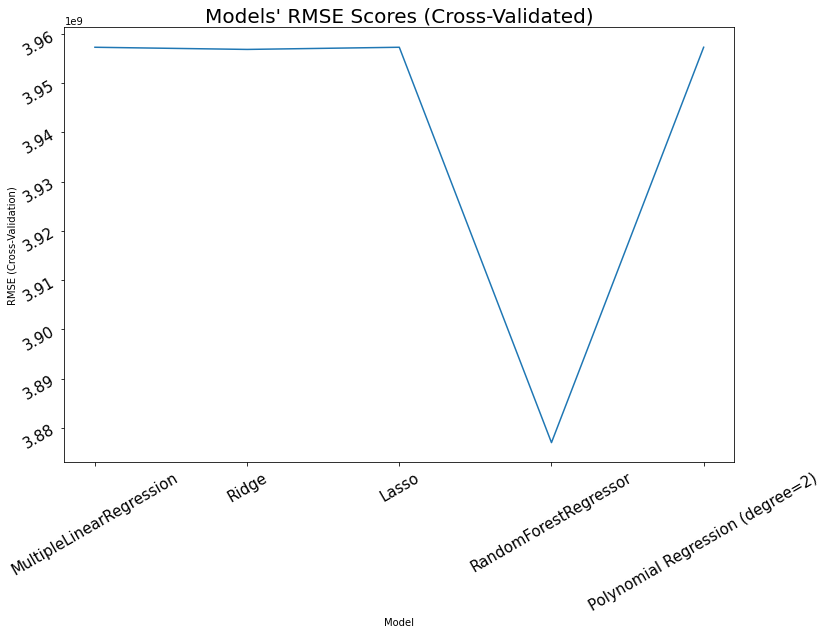

In [73]:
plt.figure(figsize=(12,8))
sns.lineplot(data= models, x="Model", y="RMSE (Cross-Validation)")
plt.title("Models' RMSE Scores (Cross-Validated)", size=20)
plt.xticks(rotation=30, size=15)
plt.yticks(rotation=30, size=15)
plt.show()

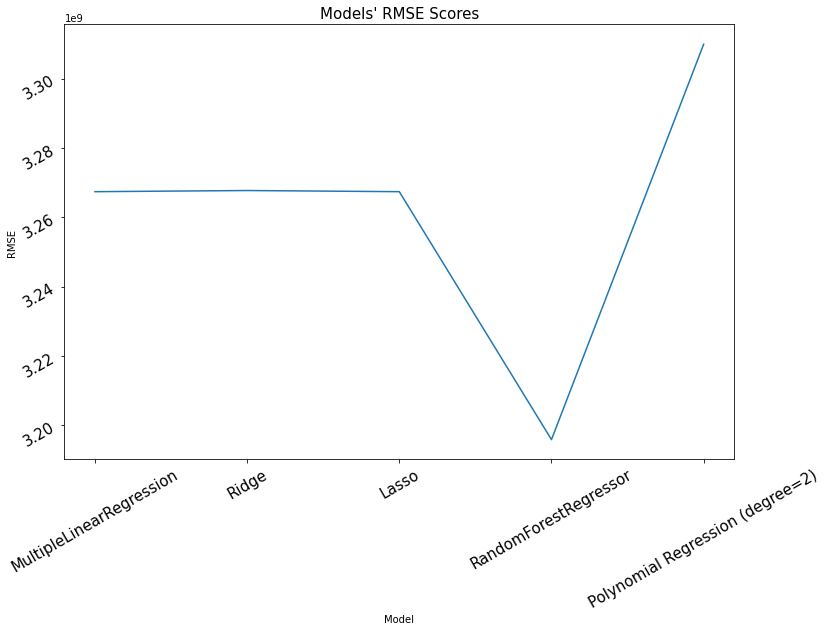

In [76]:
plt.figure(figsize=(12,8))
sns.lineplot(x=models["Model"], y=models["RMSE"])
plt.title("Models' RMSE Scores", size=15)
plt.xticks(rotation=30, size=15)
plt.yticks(rotation=30, size=15)
plt.show()

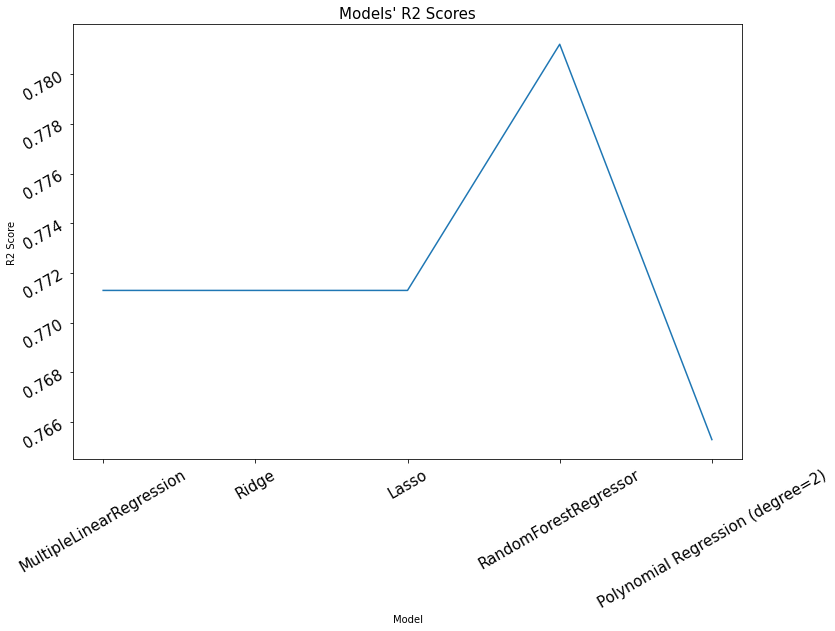

In [75]:
plt.figure(figsize=(12,8))
sns.lineplot(x=models["Model"], y=models["R2 Score"])
plt.title("Models' R2 Scores", size=15)
plt.xticks(rotation=30, size=15)
plt.yticks(rotation=30, size=15)
plt.show()

In [72]:
models

,Model,RMSE,R2 Score,RMSE (Cross-Validation)
0,MultipleLinearRegression,3.267373e+09,0.7713,3.957264e+09
1,Ridge,3.267706e+09,0.7713,3.956825e+09
2,Lasso,3.267373e+09,0.7713,3.957264e+09
3,RandomForestRegressor,3.195855e+09,0.7812,3.876985e+09
4,Polynomial Regression (degree=2),3.309900e+09,0.7653,3.957264e+09
